A cor predominante na ROI é: Amarelo


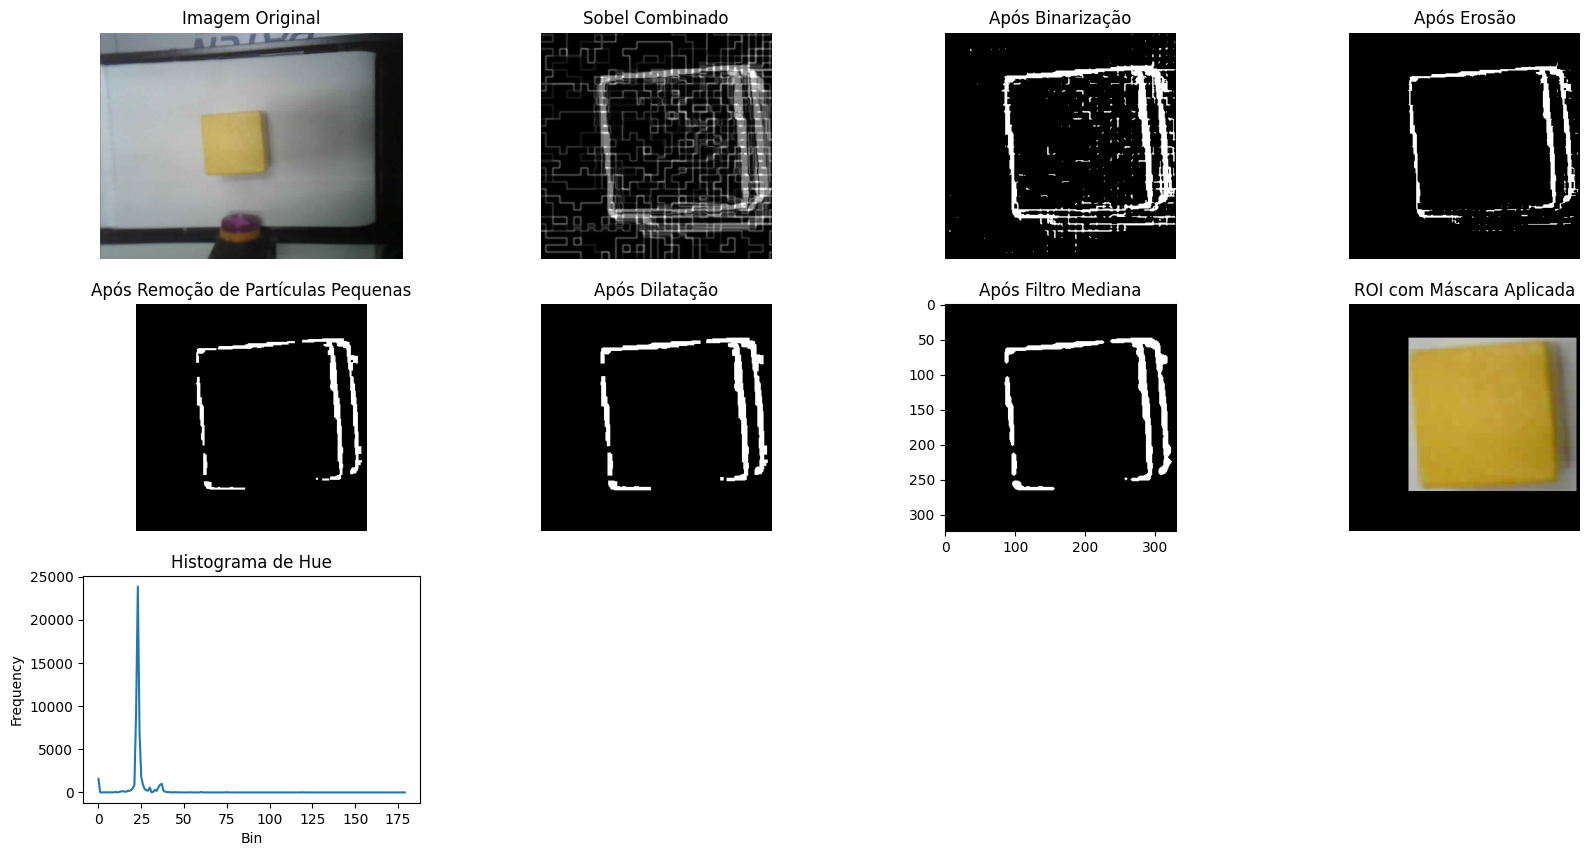

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def apply_sobel_bin_erosion_open_dilation_median_and_show(image_path):
    # Carregar a imagem original
    image = cv2.imread(image_path)
    if image is None:
        print("Erro ao carregar a imagem.")
        return

    # Permitir que o usuário selecione uma ROI
    roi = cv2.selectROI("Selecione a Região de Interesse", image)
    cv2.destroyAllWindows()

    # Verificar se uma região foi selecionada
    if roi == (0, 0, 0, 0):
        print("Nenhuma região selecionada.")
        return

    # Cortar a região de interesse da imagem
    x_roi, y_roi, w_roi, h_roi = roi
    roi_cropped = image[y_roi:y_roi+h_roi, x_roi:x_roi+w_roi]

    # Converter a ROI para espaço de cores HSV
    hsv_roi = cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2HSV)

    # Ajustar a saturação: aumentar em 50%
    hsv_roi[:, :, 1] = np.clip(hsv_roi[:, :, 1] * 1.5, 0, 255)

    # Converter de volta para BGR para exibição
    roi_cropped = cv2.cvtColor(hsv_roi, cv2.COLOR_HSV2BGR)

    # Converter a ROI para escala de cinza
    gray = cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2GRAY)

    # Aplicar o filtro de Sobel em X e Y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

    # Binarizar a imagem
    _, binarized_image = cv2.threshold(sobel_combined, 120, 255, cv2.THRESH_BINARY)

    # Definir o elemento estruturante para morfologia
    kernel = np.ones((3,3), np.uint8)

    # Aplicar erosão
    eroded_image = cv2.erode(binarized_image, kernel, iterations=1)

    # Remover partículas pequenas (abertura)
    kernel1 = np.ones((3,3), np.uint8)
    opened_image = cv2.morphologyEx(eroded_image, cv2.MORPH_OPEN, kernel1)

    # Aplicar dilatação
    dilated_image = cv2.dilate(opened_image, kernel, iterations=1)

    # Aplicar filtro de mediana
    median_filtered = cv2.medianBlur(dilated_image, 5)

    # Plotar as imagens
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Combinado')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.imshow(binarized_image, cmap='gray')
    plt.title('Após Binarização')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Após Erosão')
    plt.axis('off')

    plt.subplot(3, 4, 5)
    plt.imshow(opened_image, cmap='gray')
    plt.title('Após Remoção de Partículas Pequenas')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Após Dilatação')
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.imshow(median_filtered, cmap='gray')
    plt.title('Após Filtro Mediana')
    plt.axis('on')

    # Encontrar o retângulo delimitador para a máscara resultante
    ys, xs = np.where(median_filtered > 0)
    points = np.column_stack((xs, ys))
    if points.size:
        x, y, w, h = cv2.boundingRect(points)
        mask = np.zeros_like(roi_cropped)
        cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)
        masked_roi = cv2.bitwise_and(roi_cropped, mask)
        roi_cropped2 = roi_cropped[y:y+h, x:x+w]

        plt.subplot(3, 4, 8)
        plt.imshow(cv2.cvtColor(masked_roi, cv2.COLOR_BGR2RGB))
        plt.title('ROI com Máscara Aplicada')
        plt.axis('off')

        # Histograma do HSV
        hsv_roi2 = cv2.cvtColor(roi_cropped2, cv2.COLOR_BGR2HSV)
        hist_hue = cv2.calcHist([hsv_roi2], [0], None, [180], [0, 180])

        plt.subplot(3, 4, 9)
        plt.plot(hist_hue)
        plt.title('Histograma de Hue')
        plt.xlabel('Bin')
        plt.ylabel('Frequency')

        # Encontrar o valor de matiz mais comum
        predominant_hue = np.argmax(hist_hue)

        # Definir faixas de cores comuns no espaço HSV
        color_ranges = {
            'Vermelho': (1, 10),
            'Laranja': (11, 20),
            'Amarelo': (21, 30),
            'Verde': (31, 90),
            'Ciano': (91, 100),
            'Azul': (101, 140),
            'Violeta': (141, 160),
            'Magenta': (161, 179)
        }

        # Determinar a cor predominante
        for color, (low, high) in color_ranges.items():
            if low <= predominant_hue <= high:
                print(f"A cor predominante na ROI é: {color}")
                break
        else:
            print("A cor predominante na ROI não foi identificada.")

    plt.show()

# Caminho da imagem
image_path = r"C:\Users\igorc\Downloads\Fotos de cubos coloridos Esteira\Amarelo1.png"

# Executar a função
apply_sobel_bin_erosion_open_dilation_median_and_show(image_path)


